In [24]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv("/content/titanic.csv")

In [26]:
df = df[["Survived","Pclass","Sex","Age","Fare"]].dropna()

In [27]:
le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])

In [28]:
np.random.seed(42)
mask = np.random.rand(len(df)) < 0.5
df.loc[mask, "Survived"] = -1

In [29]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [30]:
base_model = LogisticRegression()

In [31]:
self_training_model = SelfTrainingClassifier(base_model, criterion='k_best')

In [32]:
self_training_model.fit(X, y)

SelfTrainingClassifier(criterion='k_best', estimator=LogisticRegression())

In [33]:
df["Predicted_Label"] = self_training_model.predict(X)

In [34]:
print(df.head(20))

    Survived  Pclass  Sex   Age     Fare  Predicted_Label
0         -1       3    1  34.5   7.8292                0
1          1       3    0  47.0   7.0000                1
2          0       2    1  62.0   9.6875                0
3          0       3    1  27.0   8.6625                0
4         -1       3    0  22.0  12.2875                1
5         -1       3    1  14.0   9.2250                0
6         -1       3    0  30.0   7.6292                1
7          0       2    1  26.0  29.0000                0
8          1       3    0  18.0   7.2292                1
9          0       3    1  21.0  24.1500                0
11        -1       1    1  46.0  26.0000                0
12         1       1    0  23.0  82.2667                1
13         0       2    1  63.0  26.0000                0
14        -1       1    0  47.0  61.1750                1
15        -1       2    0  24.0  27.7208                1
16        -1       2    1  35.0  12.3500                0
17        -1  

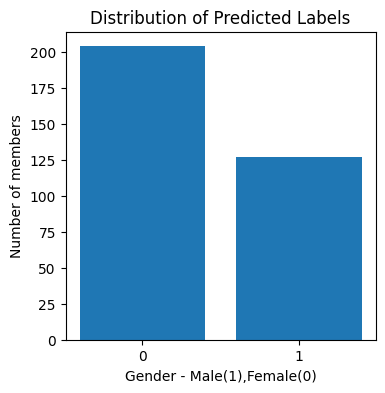

In [40]:
# Count the occurrences of each predicted label
predicted_counts = df['Predicted_Label'].value_counts()
# Create a bar plot
plt.figure(figsize=(4,4))
plt.bar(predicted_counts.index, predicted_counts.values)
plt.xlabel('Gender - Male(1),Female(0)')
plt.ylabel('Number of members')
plt.title('Distribution of Predicted Labels')
plt.xticks(predicted_counts.index) # Ensure all predicted labels are shown on x-axis
plt.show()